Newton's law of cooling states that the rate of heat loss of a body is directly proportional to the difference in the temperature in the body and its surroundings. In other words...

$ΔT∝(T-T_i)$ i.e. $ΔT=-k(T-T_i)$ (we use -k since the change is negative)

Hence, the equation is given by...

$\frac{dT}{dt} = -k(T - T_i)$

where $T$ is the temperature of the body, $T_i$ is the temperature of the surroundings, and t is the time that has elapsed since the start of the measurement.

# Temperature of an awfully hot coffee pot over time

A pot of coffee was initially at 90°C. After being kept in a room of temperature 21°C, it cooled down to 80°C after five minutes. When will the pot reach a temperature of 50°C?

In [2]:
from sympy import Symbol, Function, Eq, dsolve, solve, init_printing
import matplotlib.pyplot as plt
import numpy as np

In [3]:
init_printing(use_unicode = True)
t = Symbol('t') # Time
k = Symbol('k') # Proportional constant
T = Function('T')(t) # Pot's temperature after time t
Ti = 21 # Initial temperature
C1 = Symbol('C1') # Eventually arising integration constant

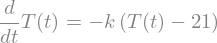

In [4]:
differentialEquation = Eq(T.diff(t), -k * (T - Ti))
differentialEquation

In [5]:
generalEquation = dsolve(differentialEquation)
generalEquation

In [6]:
initialEquation = generalEquation.subs({t : 0, T : 90})
constantValue = solve(initialEquation, C1)
constantValue

In [7]:
fiveMinutesLaterEquation = generalEquation.subs({t : 5, T : 80, C1 : 69})
fiveMinutesLaterEquation

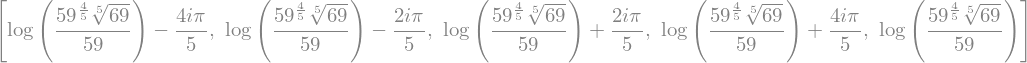

In [8]:
proportionalConstant = solve(fiveMinutesLaterEquation, k)
proportionalConstant

In [9]:
particularSolution = generalEquation.subs({k : np.log(59**(4/5) * (69)**(1/5) / 59), C1 : 69})
particularSolution

In [10]:
finalEquation = particularSolution.subs({T : 50}) 
finalEquation

In [12]:
# timeRequired = solve(finalEquation, t)
# The kernel is taking too long to solve this, hence we will do it in the following way...

In [25]:
# Let u = −0.0313138121383082t
u = Symbol('u')
modifiedFinalEquation = Eq(50, 21 + 69*np.e**u)
modifiedFinalEquation

In [26]:
# Solving for u...
solve(modifiedFinalEquation, u)

In [28]:
# But u = −0.0313138121383082t, hence...
print("Time required is", -0.866810674610784/-0.0313138121383082, "minutes.")

Time required is 27.681416455531412 minutes.


Hence, acording to Newton's law of cooling, the pot will reach 50°C after around 28 minutes, as can be observed in the plot below...

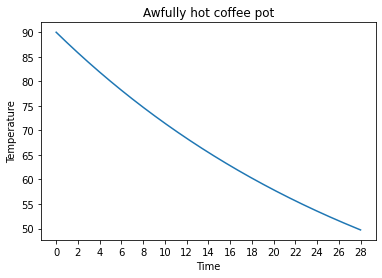

In [43]:
t = np.linspace(0, 28, 1000)
T = 21 +  69 * np.e**(-0.0313138121383082 * t)
plt.plot(t, T)
plt.title("Awfully hot coffee pot")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.xticks(ticks = range(0, 29, 2))
None